<a id='start'></a>
# Lezione 2 - Esercizi

#### Utilizziamo ed esploariamo un dataset di Pandas.

Provate a svolgere i seguenti esercizi: <br>
1) [Plottare grafici per età di uomini e donne](#section1)<a href='#section1'></a> <br>
2) [Rappresentare i morti/sopravvissuti per ogni classe](#section2)<a href='#section2'></a><br>
3) [Creare un grafico a torta dei soldi spesi per i biglietti](#section3)<a href='#section3'></a> <br>
4) [Fitting di un istogramma](#section4)<a href='#section4'></a> <br>
5) [Correzione tra prezzo biglietto ed età?](#section5)<a href='#section5'></a> <br>
6) [Correlazioni in SerieA?](#section6)<a href='#section6'></a> <br>

Importiamo il dataset del Titanic

In [7]:
import pandas as pd

titanic = pd.read_csv("data/train_dataset_titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='section1'></a>
## Plottare grafici per età di uomini e donne

Effettuare dei calcoli sulle età degli uomini e delle donne.<br>
Per risolvere l'esercizio:
1. Calcolare le principali statistiche delle serie delle età delle donne e degli uomini
2. Rappresentare le età degli uomini e delle donne su due distinti istrogrammi, per ognuno dei due istogrammi provare a fittare i dati con una fistribuzione normale e disegnare la funzione di fit calcolata.

In [8]:
donne = titanic.loc[titanic.Sex == "female"]
media_donne = donne.Age.mean()
std_donne = donne.Age.std()
print("L'età media delle donne era di: %d anni e la deviazione standard %.2f." % (media_donne, std_donne))

uomini = titanic.loc[titanic.Sex == "male"]
media_uomini = uomini.Age.mean()
std_uomini = uomini.Age.std()
print("L'età media degli uomini era di: %d anni e la deviazione standard %.2f." % (media_uomini, std_uomini))

titanic.describe()
donne.Age.describe()
uomini.Age.describe()

L'età media delle donne era di: 27 anni e la deviazione standard 14.11.
L'età media degli uomini era di: 30 anni e la deviazione standard 14.68.


count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\loren\AppData\Local\Temp\ipykernel_9032\2459395903.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="red", linewidth=2)


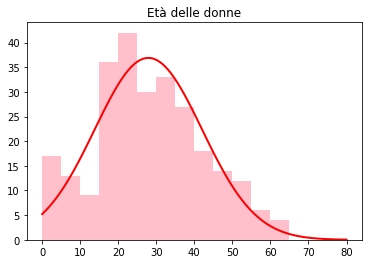

C:\Users\loren\AppData\Local\Temp\ipykernel_9032\2459395903.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="blue", linewidth=2)


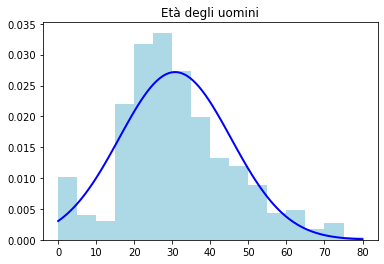

In [9]:
from scipy.stats import norm
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

max_bin = 80
num_bin = 16
xmin, xmax = 0, max_bin

# Creiamo l'istogramma per le donne non normalizzato
plt.hist(donne.Age, bins=num_bin, range=[xmin, xmax], color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
# La funzione gaussiana va moltiplicata per una costante che è
# l'integrale dell'istogramma (ovvero base per altezza di ogni bin)
p *= donne.Age.count() * max_bin/num_bin
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

# Cresiamo l'istogramma per gli uomini normalizzando i dati
plt.hist(uomini.Age, bins=num_bin, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, 'k', color="blue", linewidth=2)
plt.title("Età degli uomini")
plt.show()

Gli errori che si vedono derivano dal fatto che alcuni passeggeri hanno NaN come valore per l'età e quindi la libreria pyplot non sa come disegnare quel valore nell'istogramma.

C:\Users\loren\AppData\Local\Temp\ipykernel_9032\2772968335.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="red", linewidth=2)


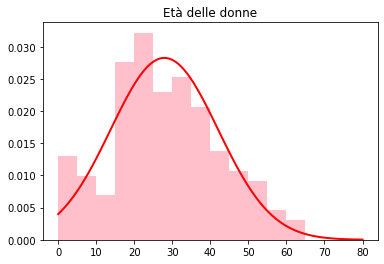

C:\Users\loren\AppData\Local\Temp\ipykernel_9032\2772968335.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="red", linewidth=2)


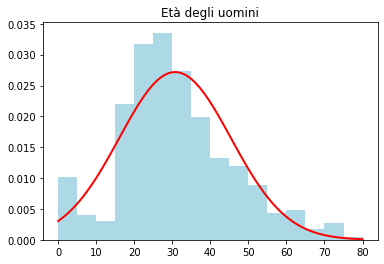

In [10]:
u = uomini[uomini.Age.notnull()]
d = donne[donne.Age.notnull()]

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

max_bin = 80
num_bin = 16
xmin, xmax = 0, max_bin

plt.hist(d.Age, bins=num_bin, range=[xmin, xmax], density=True, color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

plt.hist(u.Age, bins=num_bin, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età degli uomini")
plt.show()

Rappresentare in un grafico a pila il numero di morti e sopravvissuti per ogni classe di servizio del viaggio (prima classe, seconda classe, terza classe).

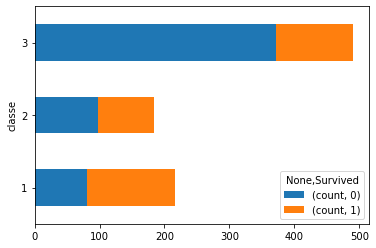

In [11]:
byclass = titanic.groupby(['Pclass', 'Survived'])['PassengerId'].aggregate(['count'])
byclass

chart_data = byclass.unstack()
chart_data = chart_data.rename_axis('classe')
chart_data

ax = chart_data.plot.barh(stacked=True)
plt.show()

<a id='section3'></a>
## Creare un grafico a torta dei soldi spesi per i biglietti

Creare un grafico a torta che rappresenti il costo complessivo dei biglietti degli uomini e delle donne.

In [ ]:
fare_bysex = titanic.groupby(['Sex'])['Fare'].aggregate(['sum']).unstack()
fare_bysex = fare_bysex.rename("prezzo")
fare_bysex

fare_bysex.plot.pie(colors=['pink', 'lightblue'], labels=['donne', 'uomini'], autopct='%1.1f%%')

<a id='section4'></a>
## Fitting di un istogramma 

Scaricate il file `data1.txt` e realizzate un programma che legga e fitti i dati in esso contenuti. Il fitting potrà essere effettuato con una funzione gaussiana. Quindi fittate i dati e mostrate i risultati del fitting. 

Fare lo stesso con i dati nel file `data2.txt`.
In questo caso il fitting dovrà avvenire con una funzione risultato della composizione di più funzioni (una per il background e una per i segnali).

Il chi quando calcolato è: 0.27320682752327613.


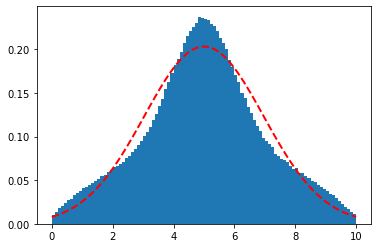

In [12]:
from scipy.stats import norm
import matplotlib.pyplot as plt

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

# let's compute chi-square
chi = sum([((b - a)**2)/a for a, b in zip(n, y)])
print(f'Il chi quando calcolato è: {chi}.')

In [16]:
data

,values
0,199.8350
1,15.1826
2,28.0203
3,170.9320
4,22.3525
...,...
105495,170.8950
105496,165.9640
105497,170.7970
105498,164.6150


Proviamo a costruire il fit "a mano" partendo da una definzione di una funzione di fit e usando il metodo `curve_fit` (ci verrà comodo per l'altra parte dell'esercizio!).

Il chi quando calcolato è: 0.32245948449104594.


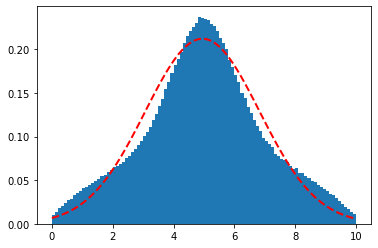

In [13]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

def fit_fuct(x, mean, std):
    f = norm(mean, std)
    return f.pdf(x)

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

bin_starts = [b for b in bins[:-1]]

popt, _ = curve_fit(fit_fuct, bin_starts, n)
y = [fit_fuct(b, *popt) for b in bin_starts]

# add a 'best fit' line
l = plt.plot(bin_starts, y, 'r--', linewidth=2)

# let's compute chi-square
chi = sum([((b - a)**2)/a for a, b in zip(n, y)])
print(f'Il chi quando calcolato è: {chi}.')

Così facendo ci è anche possibile creare una funzione di fit sull'istogramma non normalizzato (aggiungendo un fattore di scala K alla funzione della gaussiana).

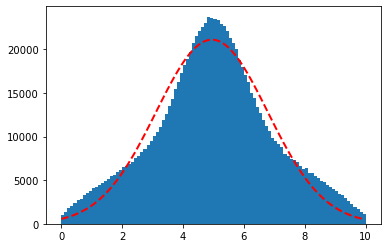

In [14]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

def fit_fuct(x, mean, std, k):
    f = norm(mean, std)
    return k * f.pdf(x)

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100)

bin_starts = [b for b in bins[:-1]]

popt, _ = curve_fit(fit_fuct, bin_starts, n)
y = [fit_fuct(b, *popt) for b in bin_starts]

# add a 'best fit' line
l = plt.plot(bin_starts, y, 'r--', linewidth=2)

Proviamo ora a fittare i dati nel scondo file, usando una funziona di fit che è la composizione di background e segnali.

C:\Users\loren\AppData\Local\Temp\ipykernel_9032\3162954531.py:10: RuntimeWarning: overflow encountered in exp
  b = intercept * np.exp(-x/exp)


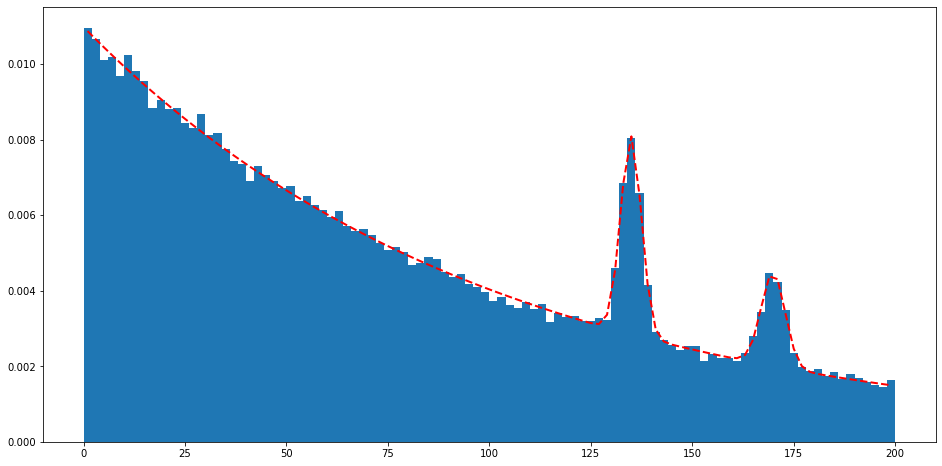

In [15]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

def fit_fuct(x, intercept, exp, k1, mean1, std1, k2, mean2, std2):
    # exponential background
    b = intercept * np.exp(-x/exp)

    # first signal
    f1 = norm(mean1, std1)

    # second signal
    f2 = norm(mean2, std2)

    return b + k1 * f1.pdf(x) + k2 * f2.pdf(x)

data = pd.read_csv('data/data2.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

bin_centers = [bins[i] + (bins[i+1] - bins[i])/2 for i in range(len(bins)-1)]

#let's help the fit, all initial parameters default to 1 unless differently specified here
initial_params = [1, 1, 1, 130, 1, 1, 170, 1]
popt, _ = curve_fit(fit_fuct, bin_centers, n, initial_params)
y = [fit_fuct(b, *popt) for b in bin_centers]

# add a 'best fit' line
l = plt.plot(bin_centers, y, 'r--', linewidth=2)

<a id='section5'></a>
## Correlazione tra prezzo biglietto ed età? 

Verificare se esiste una correlazione tra l'età del passeggero e il prezzo pagato per il biglietto. <br>
La correlezione può essere vista ad occhio facendo un grafico scatter o calcolata con un indice di correlazione.

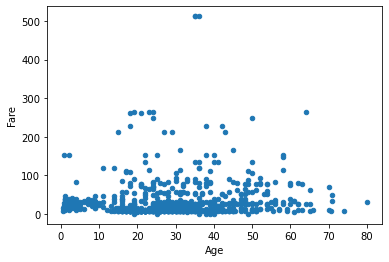

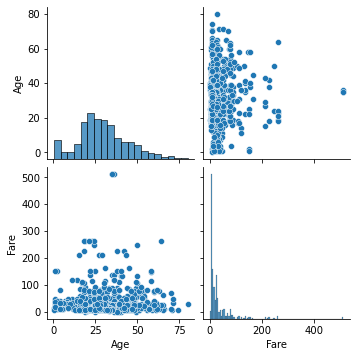

In [29]:
titanic.plot.scatter(x='Age', y='Fare')
titanic[['Age', 'Fare']].corr()
import seaborn as sns

ax = sns.pairplot(titanic[['Age', 'Fare']])
plt.show()

<a id='section6'></a>
## Correlazioni in SerieA? 

Riprendiamo il dataset sulla classifica di Serie A e vediamo se il numero di gol e le partite vinte, pareggiate e perse (in casa e fuori casa) correlano con il punteggio ottenuto in classifica.

In [30]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
classifica_serie_a = classifica_serie_a[0]
classifica_serie_a

ImportError: lxml not found, please install it

In [31]:
classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']].corr()

NameError: name 'classifica_serie_a' is not defined

In [32]:
import seaborn as sns

ax = sns.pairplot(classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']])
plt.show()

NameError: name 'classifica_serie_a' is not defined

In [33]:
import seaborn as sns

sns.heatmap(classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']].corr(), cmap="Blues")
plt.show()

NameError: name 'classifica_serie_a' is not defined

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>